In [87]:
import numpy as np
from parflow.tools.io import read_pfb
from parflow.tools.hydrology import calculate_water_table_depth
from parflow.tools.hydrology import calculate_subsurface_storage
from parflow.tools.hydrology import calculate_surface_storage
from parflow.tools.hydrology import calculate_overland_flow_grid
import matplotlib.pyplot as plt
from parflow import Run

In [88]:
run = Run.from_definition('./outputs/Dynamic_Spinup.pfidb')
data = run.data_accessor
dx = data.dx
dy = data.dy
dz = np.array([125, 70, 20, 8.0, 1.0, 0.7, 0.15, 0.1, 0.05])

nx = data.shape[2]
ny = data.shape[1]
nz = data.shape[0]

porosity = data.computed_porosity
specific_storage = data.specific_storage
mask = data.mask
slopex = data.slope_x               # shape (ny, nx)
slopey = data.slope_y               # shape (ny, nx)
mannings = data.mannings            # scalar value


Could not find key \Phase\{PhaseNameItem}\HeatCapacity\GeomNames/\Phase\{PhaseNameItem}\HeatCapacity\GeomNames in ['_parent_', '_prefix_', '_dynamic_']
Could not find key \PhaseSources/\PhaseSources in ['_parent_', '_prefix_', 'RelPerm', 'Saturation', 'ThermalConductivity', 'Names', '_details_', 'water']
Could not find key \PhaseConcen/\PhaseConcen in ['_parent_', '_prefix_', 'RelPerm', 'Saturation', 'ThermalConductivity', 'Names', '_details_', 'water']
Could not find key \Wells\{WellItem}\{WellIntervalItem}\Flux/\Wells\{WellItem}\{WellIntervalItem}\Flux in ['_parent_', '_prefix_', 'RelPerm', 'Saturation', 'ThermalConductivity', 'Names', '_details_', 'water']
Could not find key \Wells\{WellItem}\{WellIntervalItem}\Extraction\Flux/\Wells\{WellItem}\{WellIntervalItem}\Extraction\Flux in ['_parent_', '_prefix_', 'RelPerm', 'Saturation', 'ThermalConductivity', 'Names', '_details_', 'water']
Could not find key \Wells\{WellItem}\{WellIntervalItem}\Injection\Flux/\Wells\{WellItem}\{WellInterv

In [89]:
mask_all = np.flip(np.loadtxt('masks/Mask.txt'), axis = 0)
mask_all[mask_all == 0] = np.nan
mask_Lombardy = np.flip(np.loadtxt('masks/Mask_Lombardy.txt'), axis = 0)
mask_Lombardy[mask_Lombardy == 0] = np.nan
mask_Valley = np.flip(np.loadtxt('masks/Mask_Valley.txt'), axis = 0)
mask_Valley[mask_Valley == 0] = np.nan

In [104]:
wtd = [[],[],[]]
subsurface_storage = [[],[],[]]
surface_storage = [[],[],[]]
overland_flow = []
total_storage = []

for t in range(8761):
    pressure = np.load(f'outputs/Dynamic_Spinup.out.press.{t:05d}.npy')/100
    saturation = np.load(f'outputs/Dynamic_Spinup.out.satur.{t:05d}.npy')/10000

    wtd[0].append(np.nanmean(calculate_water_table_depth(pressure, saturation, dz)*mask_all))
    wtd[1].append(np.nanmean(calculate_water_table_depth(pressure, saturation, dz)*mask_Lombardy))
    wtd[2].append(np.nanmean(calculate_water_table_depth(pressure, saturation, dz)*mask_Valley))

    subsurface_storage[0].append(np.nansum(np.nansum(calculate_subsurface_storage(porosity, pressure, saturation, specific_storage, dx, dy, dz, mask=mask), axis = 0)*mask_all))
    subsurface_storage[1].append(np.nansum(np.nansum(calculate_subsurface_storage(porosity, pressure, saturation, specific_storage, dx, dy, dz, mask=mask), axis = 0)*mask_Lombardy))
    subsurface_storage[2].append(np.nansum(np.nansum(calculate_subsurface_storage(porosity, pressure, saturation, specific_storage, dx, dy, dz, mask=mask), axis = 0)*mask_Valley))

    surface_storage[0].append(np.nansum(calculate_surface_storage(pressure, dx, dy, mask=mask)*mask_all))
    surface_storage[1].append(np.nansum(calculate_surface_storage(pressure, dx, dy, mask=mask)*mask_Lombardy))
    surface_storage[2].append(np.nansum(calculate_surface_storage(pressure, dx, dy, mask=mask)*mask_Valley))

    overland_flow.append(np.sum(np.flip(calculate_overland_flow_grid(pressure, slopex, slopey, mannings, dx, dy, mask=mask), axis = 0)[80:85,183])/3600)

In [103]:
aaa = calculate_overland_flow_grid(pressure, slopex, slopey, mannings, dx, dy, mask=mask)

In [100]:
latent_heat_flux = [[0],[0],[0]]
outgoing_lw_rad = [[0],[0],[0]]
sensible_heat = [[0],[0],[0]]
ground_heat = [[0],[0],[0]]
total_ev = [[0],[0],[0]]
ground_ev = [[0],[0],[0]]
soil_ev = [[0],[0],[0]]
veg_ev = [[0],[0],[0]]
veg_tr = [[0],[0],[0]]
soil_infiltration = [[0],[0],[0]]
snow_water_eq = [[0],[0],[0]]
ground_surface_temp = [[0],[0],[0]]
temp_layer_1 = [[0],[0],[0]]
temp_layer_2 = [[0],[0],[0]]
temp_layer_3 = [[0],[0],[0]]
temp_layer_4 = [[0],[0],[0]]
temp_layer_5 = [[0],[0],[0]]

for t in range(1, 8761):
    clm_data = read_pfb('./outputs/Dynamic_Spinup.out.clm_output.'+str(t).zfill(5)+'.C.pfb')

    latent_heat_flux[0].append(np.nanmean(clm_data[0]*mask_all))
    latent_heat_flux[1].append(np.nanmean(clm_data[0]*mask_Lombardy))
    latent_heat_flux[2].append(np.nanmean(clm_data[0]*mask_Valley))

    outgoing_lw_rad[0].append(np.nanmean(clm_data[1]*mask_all))
    outgoing_lw_rad[1].append(np.nanmean(clm_data[1]*mask_Lombardy))
    outgoing_lw_rad[2].append(np.nanmean(clm_data[1]*mask_Valley))

    sensible_heat[0].append(np.nanmean(clm_data[2]*mask_all))
    sensible_heat[1].append(np.nanmean(clm_data[2]*mask_Lombardy))
    sensible_heat[2].append(np.nanmean(clm_data[2]*mask_Valley))

    ground_heat[0].append(np.nanmean(clm_data[3]*mask_all))
    ground_heat[1].append(np.nanmean(clm_data[3]*mask_Lombardy))
    ground_heat[2].append(np.nanmean(clm_data[3]*mask_Valley))

    total_ev[0].append(np.nanmean(clm_data[4]*mask_all))
    total_ev[1].append(np.nanmean(clm_data[4]*mask_Lombardy))
    total_ev[2].append(np.nanmean(clm_data[4]*mask_Valley))

    ground_ev[0].append(np.nanmean(clm_data[5]*mask_all))
    ground_ev[1].append(np.nanmean(clm_data[5]*mask_Lombardy))
    ground_ev[2].append(np.nanmean(clm_data[5]*mask_Valley))

    soil_ev[0].append(np.nanmean(clm_data[6]*mask_all))
    soil_ev[1].append(np.nanmean(clm_data[6]*mask_Lombardy))
    soil_ev[2].append(np.nanmean(clm_data[6]*mask_Valley))

    veg_ev[0].append(np.nanmean(clm_data[7]*mask_all))
    veg_ev[1].append(np.nanmean(clm_data[7]*mask_Lombardy))
    veg_ev[2].append(np.nanmean(clm_data[7]*mask_Valley))

    veg_tr[0].append(np.nanmean(clm_data[8]*mask_all))
    veg_tr[1].append(np.nanmean(clm_data[8]*mask_Lombardy))
    veg_tr[2].append(np.nanmean(clm_data[8]*mask_Valley))

    soil_infiltration[0].append(np.nanmean(clm_data[9]*mask_all))
    soil_infiltration[1].append(np.nanmean(clm_data[9]*mask_Lombardy))
    soil_infiltration[2].append(np.nanmean(clm_data[9]*mask_Valley))

    snow_water_eq[0].append(np.nanmean(clm_data[10]*mask_all))
    snow_water_eq[1].append(np.nanmean(clm_data[10]*mask_Lombardy))
    snow_water_eq[2].append(np.nanmean(clm_data[10]*mask_Valley))

    ground_surface_temp[0].append(np.nanmean(clm_data[11]*mask_all))
    ground_surface_temp[1].append(np.nanmean(clm_data[11]*mask_Lombardy))
    ground_surface_temp[2].append(np.nanmean(clm_data[11]*mask_Valley))

    temp_layer_1[0].append(np.nanmean(clm_data[13]*mask_all))
    temp_layer_1[1].append(np.nanmean(clm_data[13]*mask_Lombardy))
    temp_layer_1[2].append(np.nanmean(clm_data[13]*mask_Valley))

    temp_layer_2[0].append(np.nanmean(clm_data[14]*mask_all))
    temp_layer_2[1].append(np.nanmean(clm_data[14]*mask_Lombardy))
    temp_layer_2[2].append(np.nanmean(clm_data[14]*mask_Valley))

    temp_layer_3[0].append(np.nanmean(clm_data[15]*mask_all))
    temp_layer_3[1].append(np.nanmean(clm_data[15]*mask_Lombardy))
    temp_layer_3[2].append(np.nanmean(clm_data[15]*mask_Valley))

    temp_layer_4[0].append(np.nanmean(clm_data[16]*mask_all))
    temp_layer_4[1].append(np.nanmean(clm_data[16]*mask_Lombardy))
    temp_layer_4[2].append(np.nanmean(clm_data[16]*mask_Valley))

    temp_layer_5[0].append(np.nanmean(clm_data[17]*mask_all))
    temp_layer_5[1].append(np.nanmean(clm_data[17]*mask_Lombardy))
    temp_layer_5[2].append(np.nanmean(clm_data[17]*mask_Valley))


In [105]:
np.savetxt('series_data_Lombardy.txt', np.array((wtd[1], subsurface_storage[1], surface_storage[1], overland_flow, latent_heat_flux[1], outgoing_lw_rad[1], sensible_heat[1], ground_heat[1], total_ev[1], ground_ev[1], soil_ev[1], veg_ev[1], veg_tr[1], soil_infiltration[1], snow_water_eq[1], ground_surface_temp[1], temp_layer_1[1], temp_layer_2[1], temp_layer_3[1], temp_layer_4[1], temp_layer_5[1])).T)
np.savetxt('series_data_valley.txt', np.array((wtd[2], subsurface_storage[2], surface_storage[2], overland_flow, latent_heat_flux[2], outgoing_lw_rad[2], sensible_heat[2], ground_heat[2], total_ev[2], ground_ev[2], soil_ev[2], veg_ev[2], veg_tr[2], soil_infiltration[2], snow_water_eq[2], ground_surface_temp[2], temp_layer_1[2], temp_layer_2[2], temp_layer_3[2], temp_layer_4[2], temp_layer_5[2])).T)
np.savetxt('series_data_all.txt', np.array((wtd[0], subsurface_storage[0], surface_storage[0], overland_flow, latent_heat_flux[0], outgoing_lw_rad[0], sensible_heat[0], ground_heat[0], total_ev[0], ground_ev[0], soil_ev[0], veg_ev[0], veg_tr[0], soil_infiltration[0], snow_water_eq[0], ground_surface_temp[0], temp_layer_1[0], temp_layer_2[0], temp_layer_3[0], temp_layer_4[0], temp_layer_5[0])).T)

In [83]:
total_ev = 0
total_tr = 0
for i in range(8760):
    clm_data = read_pfb('./outputs/Dynamic_Spinup.out.clm_output.'+str(t).zfill(5)+'.C.pfb')
    total_ev += np.nanmean((clm_data[4]*mask_all*3600/1000)*2000*2000)
    total_tr += np.nanmean((clm_data[8]*mask_all*3600/1000)*2000*2000)

In [84]:
total_ev + total_tr

-201942.550804085

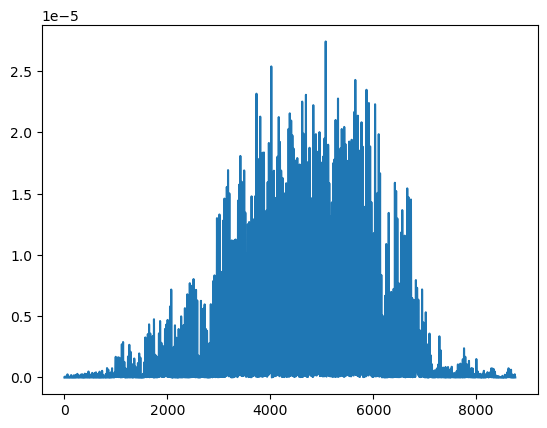

In [85]:
plt.plot(veg_tr[0])

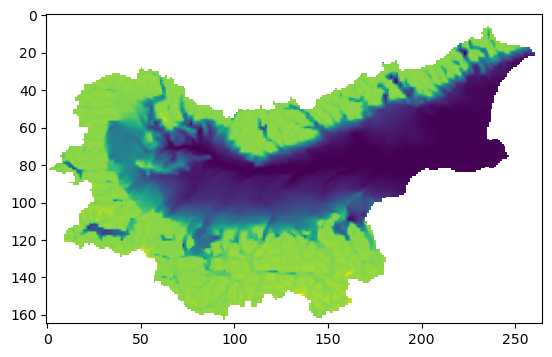

In [46]:
plt.imshow(calculate_water_table_depth(pressure, saturation, dz)*mask)

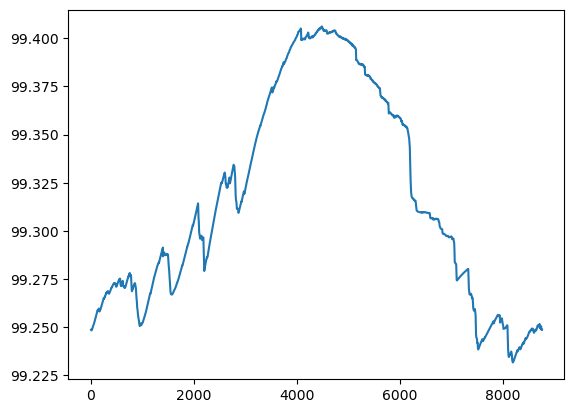

In [53]:

plt.plot(wtd[0])